<a href="https://colab.research.google.com/github/zia207/Survival_Analysis_Python/blob/main/Colab_Notebook/02_07_02_02_survival_analysis_time_dependent_covariates_python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![alt text](http://drive.google.com/uc?export=view&id=1IFEWet-Aw4DhkkVe1xv_2YYqlvRe9m5_)

# 2.2  Survival Analysis with Time-Dependent Covariates


This tutorial explains the concept of **time-dependent covariates** in survival analysis, why they are important, how to implement them, and the assumptions involved. It also provides practical examples and code snippets in R.


##  Overview


**Time-dependent covariates** (also called **time-varying covariates**) are predictor variables whose values **change over time** during the follow-up period of a survival study.


###  Examples in Practice:


- **Medical**: Blood pressure, CD4 count, treatment status (started/stopped during study)
- **Engineering**: Temperature, stress levels, maintenance status of equipment
- **Economics**: Employment status, income level, policy changes
- **Social Sciences**: Marital status, education level, behavioral changes


### Standard vs. Time-Dependent Approach:


| Standard Survival Analysis | Time-Dependent Survival Analysis |
|---------------------------|----------------------------------|
| Uses **baseline values only** | Uses **current values at time t** |
| Assumes covariates are fixed | Allows covariates to evolve |
| May introduce **bias** if values change | Provides **more accurate risk assessment** |



### Why Do We Need Time-Dependent Covariates?


-  Problem with Fixed Covariates:
Imagine studying the effect of **blood pressure** on heart attack risk:
- Patient A has BP = 120/80 at baseline but develops hypertension (160/100) after 6 months
- Standard analysis would still classify them as "low risk" based on baseline
- **Reality**: Their risk increased when BP rose

-  Solution:
Time-dependent covariates allow the **hazard at time t** to depend on the **current value** of the covariate at that exact time.



###  Mathematical Framework


`Standard Cox Model`:

$$
h(t \mid X) = h_0(t) \exp(\beta X)
$$
Where $X$ is **fixed** for each subject.

`Cox Model with Time-Dependent Covariates`:

$$
h(t \mid X(t)) = h_0(t) \exp(\beta X(t))
$$
Where $X(t)$ is the **value of the covariate at time t**.


The hazard ratio compares two individuals **at the same time point t**, using their **current covariate values** at that time.



### Data Structure: Start-Stop Format


To implement time-dependent covariates, data must be structured in **"start-stop"** (or **counting process**) format:

| ID | tstart | tstop | event | covariate |
|----|--------|-------|-------|-----------|
| 1  | 0      | 30    | 0     | 0         |
| 1  | 30     | 75    | 1     | 1         |
| 2  | 0      | 45    | 0     | 0         |
| 2  | 45     | 120   | 0     | 1         |


### Rules:


- Each row represents a **time interval** `[tstart, tstop)`
- Covariate values are **constant within each interval**
- **Event** occurs at the end of the interval where `event = 1`
- Multiple rows per subject are allowed



###  Implementation Approaches

### 1. **True Time-Dependent Covariates**


- Covariate values **actually change** during follow-up
- Example: Lab measurements, treatment initiation
- Requires **data restructuring** into start-stop format


### 2. **Time-Transformed Covariates** (for PH violation)


- Create interaction terms like `covariate × log(time)`
- Used when proportional hazards assumption is violated
- Doesn't require new data structure


### 3. **Cumulative Covariates**


- Use running averages or cumulative exposure
- Example: Total drug dose received up to time t



###  Important Assumptions and Considerations

###  Valid Assumptions:

- **No future knowledge**: Covariate at time t depends only on information available at or before t
- **Accurate timing**: Change points are recorded precisely
- **PH assumption**: Still applies to the **time-dependent coefficients**


###  Common Pitfalls:

#### 1. **Immortal Time Bias**

- **Wrong**: Assign treatment status based on future events
- **Right**: Treatment status can only change based on past/current information


#### 2. **Informative Censoring**

- If covariate measurement stops when patient deteriorates, this creates bias
- Missing data should be handled appropriately (e.g., last observation carried forward)


#### 3. **Over-splitting**

- Too many intervals can lead to computational issues
- Balance between accuracy and practicality


## Practical Example

### Scenario: Cancer Treatment Study


- Patients may **start chemotherapy** during follow-up
- We want to estimate the effect of **being on chemo at time t**


### Data Structure:

| Patient | tstart | tstop | Death | Chemo |
|---------|--------|-------|-------|-------|
| A       | 0      | 60    | 0     | 0     |
| A       | 60     | 120   | 1     | 1     |
| B       | 0      | 90    | 0     | 0     |
| B       | 90     | 180   | 0     | 1     |


### Interpretation:

- Hazard ratio for chemo represents the **instantaneous risk** of death for someone **currently on chemo** vs. **currently not on chemo**, at the same time point



### When NOT to Use Time-Dependent Covariates


1. **When covariates are truly fixed** (e.g., genetic markers, sex, baseline age)
2. **When change points are unknown or poorly recorded**
3. **When the primary interest is baseline risk prediction** rather than dynamic risk assessment


### Advantages and Benefits

### Advantages:


- **More realistic modeling** of real-world processes
- **Reduced bias** from misclassifying time-varying exposures
- **Better risk prediction** for clinical decision-making
- **Handles treatment switching** in clinical trials


### Applications:

- **Clinical research**: Treatment effects, biomarker dynamics
- **Reliability engineering**: Maintenance effects, wear-and-tear
- **Economics**: Policy impact assessment
- **Epidemiology**: Behavioral risk factor changes



## Cheeck and Load Required Packages

In [ ]:
import subprocess
import sys

def install_and_import(package_name, import_name=None):
    """Install a package if not already installed and import it"""
    if import_name is None:
        import_name = package_name

    try:
        # Try to import the package
        globals()[import_name] = __import__(import_name)
        print(f"{package_name} is already installed")
    except ImportError:
        # If not installed, install it
        print(f"Installing {package_name}...")
        try:
            subprocess.check_call([sys.executable, "-m", "pip", "install", package_name])
            globals()[import_name] = __import__(import_name)
            print(f"{package_name} installed successfully")
        except Exception as e:
            print(f"Failed to install {package_name}: {e}")
            raise

# List of packages to check/install
packages = ['pandas', 'numpy', 'matplotlib', 'seaborn', 'scikit-learn', 'lifelines']

# Install and import each package
for pkg in packages:
    try:
        install_and_import(pkg)
    except Exception as e:
        print(f"Error with package {pkg}: {e}")

# Verify installation by importing
print("Installed packages:")
for pkg in packages:
    try:
        __import__(pkg)
        print(f"✓ {pkg}")
    except ImportError:
        print(f"✗ {pkg}")

pandas is already installed
numpy is already installed
matplotlib is already installed
seaborn is already installed
Installing scikit-learn...
Failed to install scikit-learn: No module named 'scikit-learn'
Error with package scikit-learn: No module named 'scikit-learn'
lifelines is already installed
Installed packages:
✓ pandas
✓ numpy
✓ matplotlib
✓ seaborn
✗ scikit-learn
✓ lifelines


In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from lifelines import CoxPHFitter, KaplanMeierFitter
from lifelines.utils import survival_table_from_events
from lifelines.plotting import plot_lifetimes
import warnings
warnings.filterwarnings("ignore")

# Set style
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
%matplotlib inline

## Survival Analysis with Time-Dependent Covariates

### Data


We'll use the **Stanford Heart Transplant** dataset (built into the R survival package as `heart`). This dataset tracks patients waiting for heart transplants. Key features:

* It includes time-dependent covariates like `transplant` (0 = no transplant, 1 = transplant received, which changes over time for some patients).
* The data is already in counting process format: each row represents an interval with `start` (start time of interval), `stop` (end time of interval), and event (1 if event occurred at end of interval, 0 otherwise).
* Other covariates: `age` (age at entry), `year` (year of acceptance), `surgery` (prior surgery: 0/1).
* Event: `Death` or `censoring`.
* There are 103 observations from 69 patients (some have multiple rows due to time-dependent changes).

This dataset is ideal because the transplant status is time-dependent—patients start without a transplant, and some receive one later, splitting their survival time into pre- and post-transplant intervals.


In [ ]:
import pandas as pd

# Load the dataset
url = "https://raw.githubusercontent.com/zia207/Survival_Analysis_Python/main/Data/heart_transplant_data.csv"
heart= pd.read_csv(url)

# Display basic information about the dataset
print("Dataset Shape:", heart.shape)
print("\nDataset Info:")
print(heart.info())
print("\nFirst few rows:")
print(heart.head())
print("\nDataset Description:")
print(heart.describe())

Dataset Shape: (172, 9)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 172 entries, 0 to 171
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  172 non-null    int64  
 1   start       172 non-null    float64
 2   stop        172 non-null    float64
 3   event       172 non-null    int64  
 4   age         172 non-null    float64
 5   year        172 non-null    float64
 6   surgery     172 non-null    int64  
 7   transplant  172 non-null    int64  
 8   id          172 non-null    int64  
dtypes: float64(4), int64(5)
memory usage: 12.2 KB
None

First few rows:
   Unnamed: 0  start  stop  event        age      year  surgery  transplant  \
0           1    0.0  50.0      1 -17.155373  0.123203        0           0   
1           2    0.0   6.0      1   3.835729  0.254620        0           0   
2           3    0.0   1.0      0   6.297057  0.265572        0           0   
3           4    

### Visualize the Data

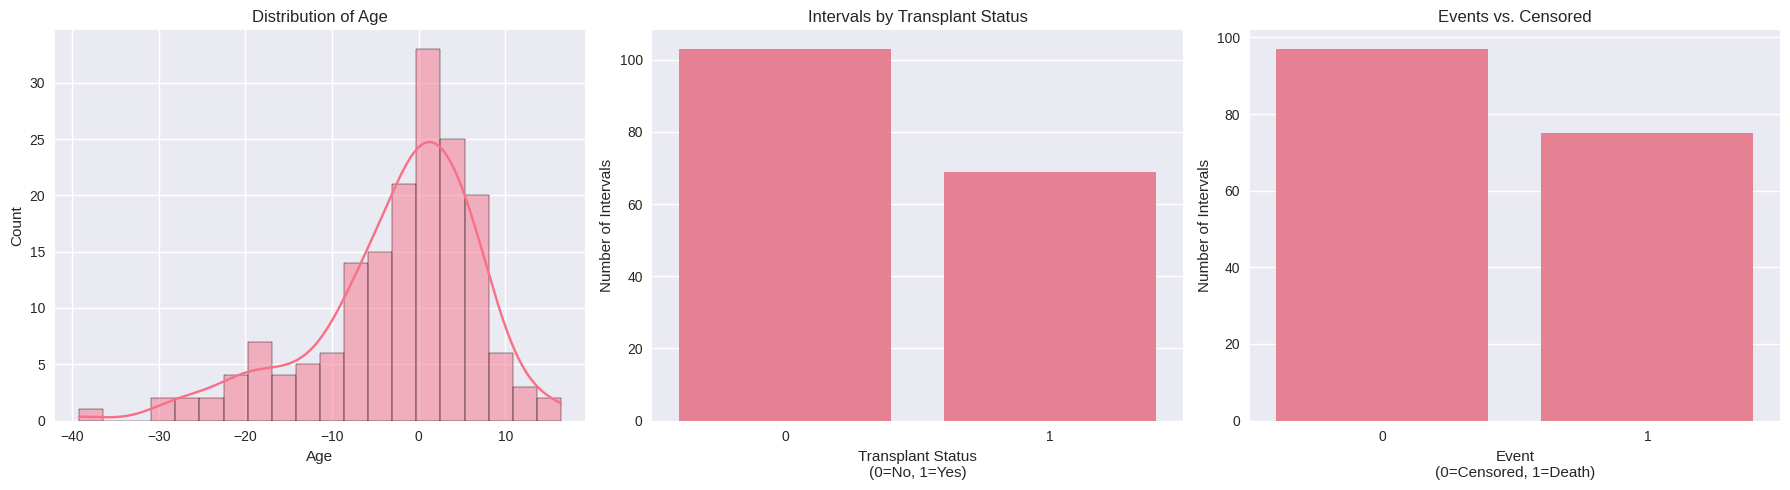

In [ ]:
### Visualize the Data

import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Distribution of age
sns.histplot(heart['age'], kde=True, bins=20, ax=axes[0])
axes[0].set_title('Distribution of Age')
axes[0].set_xlabel('Age')
axes[0].set_ylabel('Count')

# Proportion of transplant status at each interval
sns.countplot(data=heart, x='transplant', ax=axes[1])
axes[1].set_title('Intervals by Transplant Status')
axes[1].set_xlabel('Transplant Status\n(0=No, 1=Yes)')
axes[1].set_ylabel('Number of Intervals')

# Number of events vs censored
sns.countplot(data=heart, x='event', ax=axes[2])
axes[2].set_title('Events vs. Censored')
axes[2].set_xlabel('Event\n(0=Censored, 1=Death)')
axes[2].set_ylabel('Number of Intervals')

plt.tight_layout()
plt.show()


### Prepare Data for Time-Dependent Analysis


Patients are not transplanted at baseline. Some receive a transplant during follow-up. Using only baseline transplant status (=0 for everyone) would be incorrect and bias results downward (immortal time bias).

Correct approach: Use the current transplant status at time t.
This dataset is already in counting process (start-stop) format, perfect for time-dependent analysis.



### Fit Cox Model with Time-Dependent Covariates


The Cox proportional hazards model extends to time-dependent covariates naturally in the counting process format. Fit a model including fixed covariates (`age`, `surgery`) and time-dependent (`transplant`):



In [ ]:
from lifelines import CoxTimeVaryingFitter

# Initialize and fit the Cox model using the time-varying fitter
# CoxTimeVaryingFitter handles start/stop (counting process) format.
cph = CoxTimeVaryingFitter()
cph.fit(heart,
        id_col='id',
        start_col='start',
        stop_col='stop',
        event_col='event',
        strata=None)

# Print summary
cph.print_summary()

<lifelines.CoxTimeVaryingFitter: fitted with 172 periods, 103 subjects, 75 events>
         event col = 'event'
number of subjects = 103
 number of periods = 172
  number of events = 75
partial log-likelihood = -290.30
  time fit was run = 2025-12-24 04:02:28 UTC

---
            coef exp(coef)  se(coef)  coef lower 95%  coef upper 95% exp(coef) lower 95% exp(coef) upper 95%
covariate                                                                                                   
Unnamed: 0  0.01      1.01      0.01           -0.01            0.02                0.99                1.02
age         0.03      1.03      0.01            0.00            0.06                1.00                1.06
year       -0.32      0.73      0.21           -0.74            0.10                0.48                1.11
surgery    -0.61      0.54      0.37           -1.34            0.11                0.26                1.11
transplant  0.01      1.01      0.31           -0.61            0.63                0.55                1.87

            cmp to     z    p  -log2(p)
covariate                              
Unnamed: 0    0.00  0.84 0.40      1.31
age           0.00  2.03 0.04      4.57
year          0.00 -1.49 0.14      2.87
surgery       0.00 -1.67 0.10      3.39
transplant    0.00  0.03 0.98      0.04
---
Partial AIC = 590.60
log-likelihood ratio test = 15.64 on 5 df
-log2(p) of ll-ratio test = 6.98


**Interpretation**


- age,>1,Older age → higher risk of death
- surgery,<1, Prior surgery → lower risk (protective)
- transplant,<1,Receiving transplant → reduced instantaneous risk of death


### Proportional Hazards Assumption


Check proportional hazards assumption (should be non-significant for validity):


In [ ]:

from lifelines.statistics import proportional_hazard_test

# For the baseline Cox proportional hazards test, provide a "duration" column as required.
# This is the baseline time period, so duration = stop - start = stop (since start==0).
baseline = heart.loc[heart['start'] == 0].copy()
baseline['duration'] = baseline['stop'] - baseline['start']  # == baseline['stop']

# Drop columns that would create collinearity or are inappropriate for baseline CoxPH (id, time-dependent, etc)
baseline_clean = baseline.drop(
    columns=['Unnamed: 0', 'start', 'stop', 'id', 'transplant'],
    errors='ignore'
)

from lifelines import CoxPHFitter
cph_base = CoxPHFitter()
cph_base.fit(baseline_clean, duration_col="duration", event_col="event")

# Run proportional hazards test on the fitted CoxPHFitter model
test_results = proportional_hazard_test(
    cph_base, baseline_clean,
    time_transform="rank"
)
print(test_results.summary)

         test_statistic         p  -log2(p)
age            0.173139  0.677337  0.562053
surgery        1.631258  0.201529  2.310940
year           0.113474  0.736223  0.441785



If `p-values` are low, the assumption may be violated—consider stratifying or extending the model.


### Model Diagnostics and Interpretation


* `Hazard Ratios`: From `exp(coef)`, interpret as multiplicative effect on hazard rate.
* `Confidence Intervals`: Use `confint(cox_model)`.
* `Predict Survival`: For new data, use `survfit(cox_model, newdata = ...)`.




### Estimate Cumulative Baseline Hazard

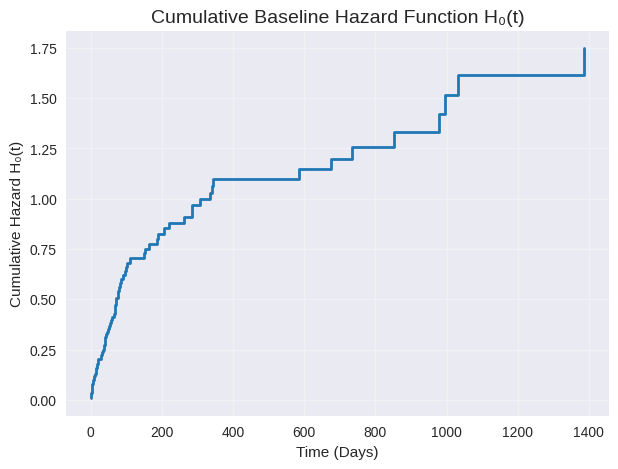

In [ ]:
# Get baseline cumulative hazard (equivalent to basehaz() in R)
baseline_hazard = cph.baseline_cumulative_hazard_

# Reset index for plotting
baseline_hazard = baseline_hazard.reset_index()
baseline_hazard.columns = ['time', 'H0_t']

# Plot
plt.figure(figsize=(7, 5))
plt.step(baseline_hazard['time'], baseline_hazard['H0_t'],
         where='post', color='#1F77B4', linewidth=2)
plt.title('Cumulative Baseline Hazard Function H₀(t)', fontsize=14)
plt.xlabel('Time (Days)')
plt.ylabel('Cumulative Hazard H₀(t)')
plt.grid(True, alpha=0.3)
plt.show()


* `Interpretation`: $ H_0(t) $ is the expected number of events (e.g., deaths) by time $ t $ for a reference individual (covariates = 0). For example, at time = 15, if hazard = 0.040615, the cumulative risk of the event is low for the baseline group.

* `Time-Dependent Covariates`: The transplant covariate’s time-dependent nature is handled in the model’s likelihood, so the baseline hazard assumes transplant = 0 (no transplant) unless specified otherwise.

* `Relation to Survival`: The baseline survival function is $S_0(t) = \exp(-H_0(t))$. We can compute this if needed.


To visualize $H_0(t)$, we can plot it against time using ggplot2 for clarity. The cumulative hazard typically increases over time, with steps at each event.


### Compute Baseline Survival


If you want the baseline survival function $S_0(t) = \exp(-H_0(t)) $:


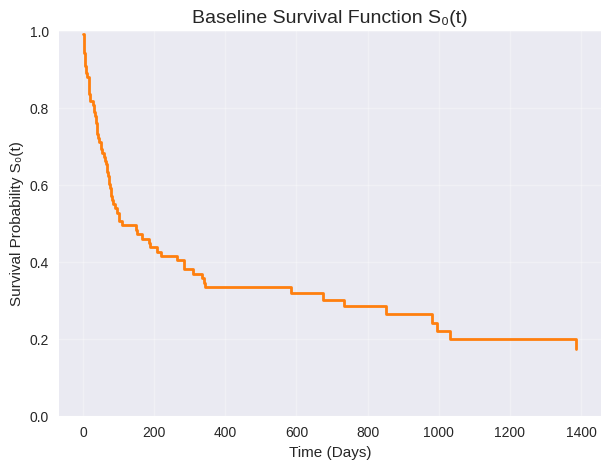

In [ ]:
baseline_hazard['S0_t'] = np.exp(-baseline_hazard['H0_t'])

plt.figure(figsize=(7, 5))
plt.step(baseline_hazard['time'], baseline_hazard['S0_t'],
         where='post', color='#FF7F0E', linewidth=2)
plt.title('Baseline Survival Function S₀(t)', fontsize=14)
plt.xlabel('Time (Days)')
plt.ylabel('Survival Probability S₀(t)')
plt.ylim(0, 1)
plt.grid(True, alpha=0.3)
plt.show()

### Predict Survival for a New Patient


To estimate the cumulative hazard for a specific patient (e.g., age = mean, surgery = 1, transplant = 1), use the model’s coefficients:


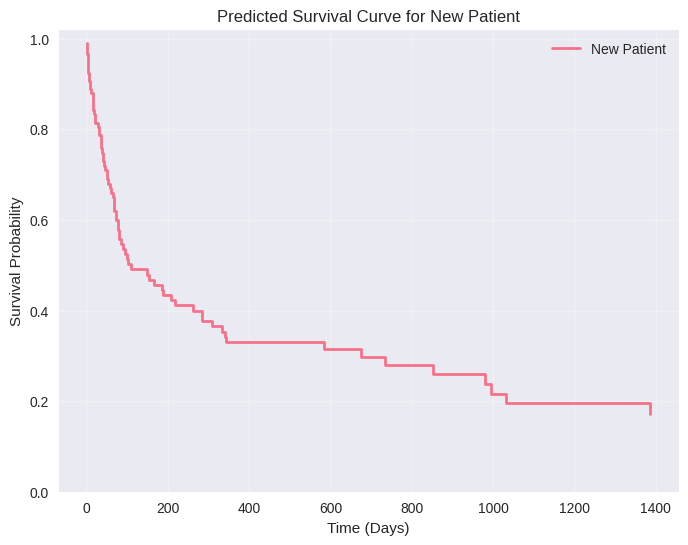

In [ ]:
# Use baseline_hazard and betas from previous cells

# Define example new patient if not exists (age, surgery, transplant)
# You should adjust values as appropriate for your analysis
new_patient = pd.DataFrame({'age': [0], 'surgery': [0], 'transplant': [1]})

def survival_from_baseline(x_row):
    lp = (x_row[['age', 'surgery', 'transplant']].astype(float).values * betas.values).sum()
    multiplier = np.exp(lp)
    s = np.exp(-baseline_hazard['H0_t'] * multiplier)
    return pd.Series(s.values, index=baseline_hazard['time'])

# Predict survival for new_patient
s_new = survival_from_baseline(new_patient.loc[0])

plt.figure(figsize=(8, 6))
plt.step(s_new.index, s_new.values, where='post', label='New Patient', linewidth=2)
plt.title('Predicted Survival Curve for New Patient')
plt.xlabel('Time (Days)')
plt.ylabel('Survival Probability')
plt.ylim(0, 1.02)
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()


### Compare Survival: Transplant vs. No Transplant

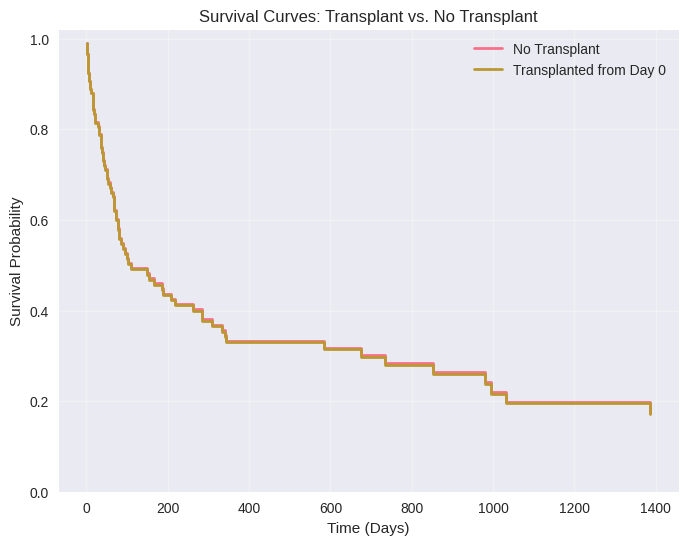

In [ ]:
# Scenario 1: Never transplanted
no_tx = pd.DataFrame({'age': [0], 'surgery': [0], 'transplant': [0]})

# Scenario 2: Always transplanted (from day 0)
always_tx = pd.DataFrame({'age': [0], 'surgery': [0], 'transplant': [1]})

# Use baseline cumulative hazard and model coefficients to compute survival:
# S(t | x) = exp(- H0(t) * exp(x' beta))
# baseline_hazard must exist (created earlier) and contain 'time' and 'H0_t'
# cph (fitted CoxTimeVaryingFitter) must exist and contain coefficients in params_

# Extract coefficients (ensure the required covariates exist)
betas = cph.params_.reindex(['age', 'surgery', 'transplant']).fillna(0).astype(float)

def survival_from_baseline(x_row):
	# linear predictor
	lp = (x_row[['age', 'surgery', 'transplant']].astype(float).values * betas.values).sum()
	multiplier = np.exp(lp)
	s = np.exp(-baseline_hazard['H0_t'] * multiplier)
	# return a Series indexed by time so plotting works the same way as lifelines output
	return pd.Series(s.values, index=baseline_hazard['time'])

# Compute survival curves for both scenarios
s_no = survival_from_baseline(no_tx.loc[0])
s_yes = survival_from_baseline(always_tx.loc[0])

plt.figure(figsize=(8, 6))
plt.step(s_no.index, s_no.values, where='post', label='No Transplant', linewidth=2)
plt.step(s_yes.index, s_yes.values, where='post', label='Transplanted from Day 0', linewidth=2)
plt.title('Survival Curves: Transplant vs. No Transplant')
plt.xlabel('Time (Days)')
plt.ylabel('Survival Probability')
plt.ylim(0, 1.02)
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

## Summary and Conclusion


Using time-dependent covariates in Python with `lifelines` is a powerful technique for handling complexlifelines is straightforward and powerful. This approach correctly models real-world scenarios like treatment initiation (transplant, chemotherapy, etc.) and avoids serious biases like immortal time bias. The heart dataset’s time-dependent structure is handled seamlessly in the Cox model. Use the visualizations to interpret how risk accumulates, and adjust for specific covariates as needed. Time-dependent covariates allow for more realistic modeling of changing risk factors over time, improving the validity and applicability of survival analysis in many fields.



## Resources


1. lifelines Documentation – https://lifelines.readthedocs.io
2. Stanford Heart Transplant Dataset – Built-in example in survival analysis
3. Survival Analysis in Python (Tutorial) – https://github.com/CamDavidsonPilon/lifelines
4. Book: "Modeling Survival Data" by Therneau & Grambsch – Gold standard reference
5. Scikit-survival (for advanced models): https://scikit-survival.readthedocs.io